In [1]:
from mors_mini_gym_env import MorsMiniBulletEnv
import math
import numpy as np
import pybullet as p
import time

environment = MorsMiniBulletEnv(urdf_root="./urdf",
                                    world="empty",
                                    sim_freq=240,
                                    hard_reset=True,
                                    render=True,
                                    on_rack=False,
                                    self_collision_enabled=False,
                                    max_timesteps = np.inf,
                                    debug_mode = True,
                                    floating_camera=False,
                                    step_enabled=True,

                                    accurate_motor_model_enabled=False,
                                    simple_motor_model_enabled=False,
                                    torque_control_enabled=False,
                                    motor_kp=0,
                                    motor_kd=0,
                                    motor_velocity_limit=np.inf,
                                    
                                    action_repeat=1,
                                    rew_scale = 1,
                                    distance_limit=float("inf"),
                                    observation_noise_stdev=0.0,
                                    normalization = False,

                                    ext_disturbance_enabled = False,
                                    lidar_enabled=True,
                                    camera_enabled = True
                                    )

steps = 20000
step = 0
amplitude = 0.2
speed = 2
it = 0

actions_and_observations = []
action = [0]*12
angles = [0]*12
vels = [0]*12
torques = [0]*12
# action[0] = 0.2

kp = 0
kd = 0

time_vec = []
cur_angles_vec = []
cur_omegas_vec = []
cur_tau_vec = []

worlds = ["gazebo_racetrack_day", "empty", "random1", "random2"]

environment.set_ext_forces_params(1200, 6, 500)

numJoints = environment._pybullet_client.getNumJoints(environment.quadruped)
print(numJoints)
for i in range(numJoints):
    lst = environment._pybullet_client.getJointInfo(environment.quadruped, i)
    print(f"idx={lst[0]} name={lst[1]}")



environment.lidar.set_params(True, np.radians(170), -np.radians(170), 360, 0.2, 1)
environment.lidar.reset()

# # for i in range(len(worlds)):
# #     environment.set_world(worlds[i])
# #     environment.reset()
# for step_counter in range(steps):
#     # Matches the internal timestep.
#     time_step = 0.00417
#     step += 1
#     t = step_counter * time_step
    
#     # action[0] = math.sin(speed * t) * amplitude * 2
#     # action[1] = math.sin(speed * t) * amplitude * 2
#     # action[2] = -math.sin(speed * t) * amplitude * 4

#     # action[3] = math.sin(speed * t) * amplitude
#     # action[4] = -math.sin(speed * t) * amplitude * 2
#     # action[5] = math.sin(speed * t) * amplitude * 4

#     # action[6] = -math.sin(speed * t) * amplitude * 2
#     # action[7] = math.sin(speed * t) * amplitude * 2
#     # action[8] = -math.sin(speed * t) * amplitude * 4

#     # action[9] = -math.sin(speed * t) * amplitude
#     # action[10] = -math.sin(speed * t) * amplitude * 2
#     # action[11] = +math.sin(speed * t) * amplitude * 4
#     if kp < 30:
#         kp += 0.32
#     if kd < 0.1:
#         kd += 0.005

#     # if step % 240 == 0:
#     # if action[0] < 0.6:
#     #     action[0] += 0.0016
#     # action[1] = 1.5
#     # angles[0] = 0
#     # torques[0] = -1.5

#     environment.set_kpkd(kp, kd)
#     # environment.set_motor_commands(angles, vels, torques)
#     observation, _, _, _ = environment.step(action)
    
#     time_vec.append(t)
#     cur_angles_vec.append(observation[0:12])
#     cur_omegas_vec.append(observation[12:24])
#     cur_tau_vec.append(observation[24:35])

#     # time.sleep(0.1)
#     environment.camera.get_pointcloud()
    

# environment.reset()
# environment.close()


pybullet build time: May 20 2022 19:44:17


argv[0]=
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=3
argv[0] = --unused
argv[1] = 
argv[2] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 3080 Laptop GPU/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 470.199.02
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 470.199.02
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 3080 Laptop GPU/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation
/home/yoggi/walkingbro_ws/src/walkerbro_sim/urdf/walkerbro.urdf
b3Printf: b3Warning

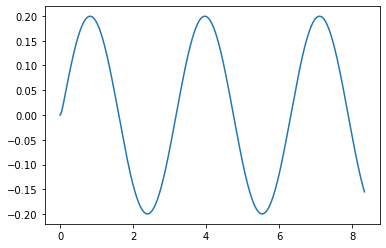

In [ ]:
import matplotlib.pyplot as plt

abad_r1_angles = []
for i in range(len(cur_angles_vec)):
    abad_r1_angles.append(cur_angles_vec[i][0])

# print(abad_r1_angles)

plt.plot(time_vec, abad_r1_angles)

In [ ]:
import numpy as np
a = [1, 2, 3]
b = [4, 5, 6]
print(np.add(a, b))
print(np.subtract(a, b))
print(np.multiply(a, b))
print(np.divide(a, b))


[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]


In [ ]:
import numpy as np

a = np.array([1,2,3])
b = np.array([1])
b = np.append(b, a)
b


array([1, 1, 2, 3])

In [ ]:
from motor_simple import MotorSimple
import numpy as np
motor_num = 12
motor = MotorSimple(motor_num)
cur_angle = [0]*motor_num
cur_omega = [0]*motor_num

cur_angle_vec = []
omega_vec = []
u_vec = []

for i in range(20):
    motor.set_sensor_data(cur_angle, cur_omega)
    motor.set_ref_angle([1]*motor_num, [0]*motor_num, [0]*motor_num, [1]*motor_num, [0.1]*motor_num)

    cur_angle[0] += 0.01
    cur_omega[0] = 10

    u = motor.step()
    u_vec.append(round(u[0], 2))
    cur_angle_vec.append(round(cur_angle[0], 2))
    omega_vec.append(round(cur_omega[0], 2))

print(cur_angle_vec)
print(omega_vec)
print(u_vec)

TypeError: set_ref_angle() takes 2 positional arguments but 6 were given

In [ ]:
import numpy

T1 = numpy.mat([[ 0,   1, 0, 0.0], 
                [ -1,   0, 0, 0.0],
                [ 0,   0, 1, 0.0], 
                [ 0,   0, 0, 1.0]])

T2 = numpy.mat([[ 0,   0, 1, 0.0], 
                [ 0,   1, 0, 0.0],
                [-1,   0, 0, 0.0], 
                [ 0,   0, 0, 1.0]])
T3 = T2*T1
print(T3)
print(numpy.array([[0],[0],[1],[1]]))

[[ 0.  0.  1.  0.]
 [-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  1.]]
[[0]
 [0]
 [1]
 [1]]


In [4]:
import numpy as np 

arr = np.array([1,2,3,4,5])
arr += 1
print(arr)

[2 3 4 5 6]


In [1]:
order = [5,4,7,8,2,0,1]
for i in order:
    print(i)

5
4
7
8
2
0
1


In [3]:
from math import *
lst = [0.34700000286102295, 0.34700000286102295, 0.34599998593330383, 0.34599998593330383, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.35100001096725464, 0.35100001096725464, 0.35100001096725464, 0.3529999852180481, 0.3529999852180481, 0.3540000021457672, 0.35499998927116394, inf, inf, inf, 0.20399999618530273, 0.20399999618530273, 0.20399999618530273, 0.2029999941587448, 0.20100000500679016, 0.8870000243186951, 0.8870000243186951, 0.8550000190734863, 0.8240000009536743, 0.8050000071525574, 0.8050000071525574, 0.8029999732971191, 0.8029999732971191, 0.8040000200271606, inf, inf, inf, inf, inf, 0.8410000205039978, 0.8410000205039978, 0.8410000205039978, inf, inf, inf, inf, 1.2020000219345093, 1.2020000219345093, 1.2020000219345093, 1.215999960899353, 1.2259999513626099, 0.18199999630451202, 1.2339999675750732, 1.2419999837875366, 1.25, 1.25, 1.2350000143051147, 1.2350000143051147, 1.218999981880188, 1.1990000009536743, 1.180999994277954, 1.180999994277954, 1.156000018119812, inf, inf, inf, inf, inf, inf, inf, inf, 0.4259999990463257, 0.4259999990463257, 0.4259999990463257, 0.41499999165534973, 0.41100001335144043, 0.4050000011920929, 0.4020000100135803, 0.40299999713897705, 0.40299999713897705, 0.4009999930858612, 0.4000000059604645, 0.4000000059604645, 0.39899998903274536, 0.4009999930858612, 0.40799999237060547, 0.40799999237060547, 0.4090000092983246, 0.4169999957084656, 0.42500001192092896, 0.42500001192092896, inf, inf, inf, 0.8759999871253967, 0.8759999871253967, 0.8759999871253967, 0.8659999966621399, 0.8600000143051147, 0.8600000143051147, 0.8539999723434448, 0.8410000205039978, 0.8429999947547913, 0.8429999947547913, 0.8339999914169312, 0.8309999704360962, 0.824999988079071, 0.8199999928474426, 0.8199999928474426, 0.8149999976158142, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.800000011920929, 0.7960000038146973, 0.7910000085830688, 0.7879999876022339, 0.7879999876022339, 0.7839999794960022, 0.781000018119812, 0.7749999761581421, 0.7720000147819519, 0.7720000147819519, 0.7710000276565552, inf, inf, inf, inf, inf, inf, inf, 0.42899999022483826, 0.42899999022483826, 0.42899999022483826, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.375, 0.375, 0.375, 0.37299999594688416, 0.37299999594688416, 0.36500000953674316, 0.36399999260902405, 0.36399999260902405, 0.3610000014305115, 0.35600000619888306, 0.35600000619888306, 0.35600000619888306, 0.35899999737739563, 0.35899999737739563, 0.36399999260902405, 0.35100001096725464, 0.35100001096725464, 0.35100001096725464, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.3400000035762787, 0.3400000035762787, 0.3400000035762787, 0.34200000762939453, 0.34200000762939453, 0.33799999952316284, 0.33899998664855957, 0.33799999952316284, 0.33799999952316284, 0.33799999952316284, 0.33799999952316284, 0.33399999141693115, 0.33500000834465027, 0.33500000834465027, 0.33500000834465027, 0.3319999873638153, 0.3319999873638153, 0.33000001311302185, 0.3310000002384186, 0.3310000002384186, 0.32899999618530273, 0.33000001311302185, 0.33000001311302185, 0.32899999618530273, 0.32899999618530273, inf, inf, inf, inf, inf, inf, inf, 0.3240000009536743, 0.3240000009536743, 0.3240000009536743, 0.32499998807907104, 0.3230000138282776, 0.3230000138282776, 0.3269999921321869, 0.3269999921321869, 0.3269999921321869, inf, inf, 0.25, 0.25, 0.25, 0.24199999868869781, 0.2370000034570694, 0.22499999403953552, 0.23000000417232513, 0.23000000417232513, 0.22200000286102295, 0.22200000286102295, 0.22100000083446503, 0.2199999988079071, inf, inf, 0.21899999678134918, 0.21899999678134918, 0.21899999678134918, 0.21899999678134918, 0.2160000056028366, 0.2150000035762787, 0.2150000035762787, 0.21400000154972076, 0.21400000154972076, 0.210999995470047, 0.210999995470047, 0.20800000429153442, 0.20800000429153442, 0.20800000429153442, 0.20999999344348907, 0.20600000023841858, 0.20399999618530273, 0.20399999618530273, 0.2029999941587448, 0.20100000500679016, 0.20000000298023224, 0.20000000298023224, 0.19900000095367432, 0.19900000095367432, 0.1979999989271164, 0.1979999989271164, 0.19699999690055847, 0.19599999487400055, 0.19599999487400055, 0.19499999284744263, 0.19499999284744263, 0.19499999284744263, 0.19499999284744263, 0.19300000369548798, 0.19300000369548798, 0.19200000166893005, 0.19200000166893005, 0.19099999964237213, 0.19099999964237213, 0.19099999964237213, 0.1889999955892563, 0.18799999356269836, 0.18799999356269836, 0.18799999356269836, 0.18700000643730164, 0.1860000044107437, 0.1860000044107437, 0.1860000044107437, 0.1850000023841858, 0.18400000035762787, 0.18400000035762787, 0.18400000035762787, 0.18299999833106995, 0.18199999630451202, 0.18199999630451202, 0.18199999630451202, 0.1809999942779541, 0.1809999942779541, 0.18000000715255737, 0.18000000715255737, 0.18000000715255737, 0.17900000512599945, 0.17900000512599945, 0.17800000309944153, 0.17800000309944153, 0.17800000309944153, 0.1770000010728836, 0.1770000010728836, 0.1770000010728836, 0.1770000010728836, 0.1770000010728836, 0.17599999904632568, 0.17599999904632568, 0.17599999904632568, 0.17599999904632568, 0.17599999904632568, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.1720000058412552, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17299999296665192, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17599999904632568, 0.17599999904632568, 0.1770000010728836, 0.1770000010728836, 0.1770000010728836, 0.17800000309944153, 0.17900000512599945, 0.17900000512599945, 0.18000000715255737, 0.1809999942779541, 0.18199999630451202, 0.18199999630451202, 0.18299999833106995, 0.18400000035762787, 0.1850000023841858, 0.1860000044107437, 0.1860000044107437, 0.18700000643730164, 0.18799999356269836, 0.18799999356269836, 0.1889999955892563, 0.19099999964237213, 0.19200000166893005, 0.19300000369548798, 0.19300000369548798, 0.1940000057220459, 0.19499999284744263, 0.19699999690055847, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.19900000095367432, 0.19900000095367432, 0.1979999989271164, 0.19599999487400055, 0.19499999284744263, 0.19300000369548798, 0.19300000369548798, 0.19099999964237213, 0.1889999955892563, 0.18700000643730164, 0.1860000044107437, 0.1860000044107437, 0.18400000035762787, 0.18299999833106995, 0.1809999942779541, 0.1809999942779541, 0.18000000715255737, 0.17900000512599945, 0.17800000309944153, 0.17800000309944153, 0.1770000010728836, 0.1770000010728836, 0.17599999904632568, 0.17599999904632568, 0.17599999904632568, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17399999499320984, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17499999701976776, 0.17599999904632568, 0.17599999904632568, 0.1770000010728836, 0.17800000309944153, 0.17900000512599945, 0.1809999942779541, 0.1809999942779541, 0.18199999630451202, 0.1850000023841858, 0.18799999356269836, 0.18799999356269836, 0.19099999964237213, 0.19099999964237213, 0.20200000703334808, 0.20200000703334808, 0.21299999952316284, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.236999988555908, 2.236999988555908, 2.236999988555908, 2.2139999866485596, 2.2139999866485596, 2.2060000896453857, 2.1989998817443848, 2.1760001182556152, 2.1760001182556152, 2.1760001182556152, 3.0250000953674316, 3.0250000953674316, 3.0, 2.9670000076293945, 2.934000015258789, 2.934000015258789, 2.884999990463257, 2.803999900817871, 2.7939999103546143, 2.8369998931884766, 2.8369998931884766, 2.6989998817443848, 2.6989998817443848, 2.7160000801086426, 2.5420000553131104, 2.5420000553131104, 2.8489999771118164, 2.8489999771118164, 2.8489999771118164, 2.8540000915527344, 2.5139999389648438, 2.493000030517578, 2.496000051498413, 2.496000051498413, 2.621999979019165, 2.6029999256134033, 2.625999927520752, 2.625999927520752, 2.742000102996826, 2.75600004196167, 2.7860000133514404, 2.881999969482422, 2.881999969482422, 2.996000051498413, 3.0, 3.0, 3.005000114440918, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.2290000021457672, 0.2290000021457672, 0.2290000021457672, inf, inf, inf, 0.19099999964237213, 0.19099999964237213, 0.19099999964237213, 0.18700000643730164, 0.1850000023841858, 0.1850000023841858, 0.18299999833106995, 0.18000000715255737, 0.17800000309944153, 0.17800000309944153, 0.1770000010728836, 0.17499999701976776, 0.17399999499320984, 0.17299999296665192, 0.17299999296665192, 0.1720000058412552, 0.17100000381469727, 0.17000000178813934, 0.16899999976158142, 0.1679999977350235, 0.1679999977350235, 0.16699999570846558, 0.16599999368190765, 0.16500000655651093, 0.16500000655651093, 0.164000004529953, 0.16300000250339508, 0.16200000047683716, 0.16200000047683716, 0.16099999845027924, 0.1599999964237213, 0.1589999943971634, 0.15700000524520874, 0.15700000524520874, 0.1550000011920929, 0.15399999916553497, 0.15199999511241913, 0.15199999511241913, 0.1509999930858612, 0.1509999930858612, 0.15000000596046448, 0.15000000596046448, 0.15000000596046448, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.14900000393390656, 0.15000000596046448, 0.15000000596046448, 0.15000000596046448, 0.15000000596046448, 0.1509999930858612, 0.1509999930858612, 0.1509999930858612, 0.15199999511241913, 0.15299999713897705, 0.1550000011920929, 0.1550000011920929, 0.15600000321865082, 0.15700000524520874, 0.1589999943971634, 0.1589999943971634, 0.16099999845027924, 0.16200000047683716, 0.164000004529953, 0.16500000655651093, 0.16500000655651093, 0.16599999368190765, 0.16699999570846558, 0.1679999977350235, 0.1679999977350235, 0.1679999977350235, 0.1679999977350235, 0.16899999976158142, 0.17000000178813934, 0.17000000178813934, 0.17000000178813934, 0.1720000058412552, 0.17800000309944153, 0.17800000309944153, 0.1889999955892563, 0.1889999955892563, 0.19200000166893005, 0.19499999284744263, 0.19499999284744263, 0.19900000095367432, 0.19900000095367432, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20100000500679016, 0.20100000500679016, 0.20100000500679016, 0.20100000500679016, 0.20100000500679016, 0.20000000298023224, 0.19900000095367432, 0.19699999690055847, 0.19699999690055847, 0.19499999284744263, 0.19499999284744263, 0.19499999284744263, 0.19499999284744263, 0.19599999487400055, 0.19699999690055847, 0.19900000095367432, 0.19900000095367432, 0.20399999618530273, 0.23800000548362732, 0.23800000548362732, 0.23800000548362732, 0.2329999953508377, 0.24400000274181366, 0.2460000067949295, 0.2460000067949295, 0.2460000067949295, 0.24899999797344208, 0.24899999797344208, 0.24799999594688416, 0.24799999594688416, 0.25, 0.25, 0.25, inf, 0.2529999911785126, 0.2529999911785126, 0.2529999911785126, 0.25099998712539673, inf, 0.2549999952316284, 0.2549999952316284, 0.2549999952316284, 0.26100000739097595, 0.2669999897480011, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1.281000018119812, 1.281000018119812, 1.281000018119812, 1.2680000066757202, 1.2630000114440918, 1.253999948501587, 1.253999948501587, 1.2489999532699585, 1.2380000352859497, 1.2330000400543213, 1.225000023841858, 1.225000023841858, inf, 0.37299999594688416, 0.37299999594688416, 0.37299999594688416, 0.3659999966621399, 0.3610000014305115, 0.3580000102519989, 0.3580000102519989, 0.35499998927116394, 0.35100001096725464, 0.3490000069141388, 0.3490000069141388, 0.34700000286102295, 0.3440000116825104, 0.3440000116825104, 0.3409999907016754, 0.33899998664855957, 0.33899998664855957, 0.335999995470047, 0.335999995470047, 0.33500000834465027, 0.33500000834465027, 0.33399999141693115, 0.3330000042915344, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.3310000002384186, 0.33399999141693115, 0.33500000834465027, 0.33500000834465027, 0.335999995470047, 0.335999995470047, 0.335999995470047, 0.33899998664855957, 0.33899998664855957, 0.34200000762939453, 0.34599998593330383, 0.3499999940395355, 0.3499999940395355, 0.35499998927116394, 0.3610000014305115, 0.3610000014305115, 0.3619999885559082, 0.3619999885559082, 0.3610000014305115, 0.3610000014305115, 0.3610000014305115, 0.35899999737739563, 0.3580000102519989, 0.3569999933242798, 0.3569999933242798, 0.3540000021457672, 0.3540000021457672, 0.35199999809265137, 0.35199999809265137, 0.3499999940395355, 0.3499999940395355, 0.3490000069141388, 0.3479999899864197, 0.3479999899864197, 0.3479999899864197, 0.34700000286102295, 0.34599998593330383, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295, 0.34700000286102295]
len(lst)

760